In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

In [31]:
iris = load_iris()
X = iris.data
y= iris.target

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
y_pred= knn.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'macro')
recall = recall_score(y_test, y_pred, average= 'macro')
f1 = f1_score(y_test, y_pred, average= 'macro')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Classification Report: ")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



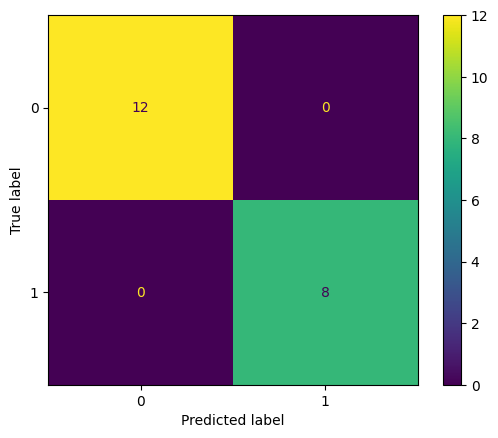

In [38]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

In [39]:
y_probs = knn.predict_proba(X_test)[:,1]


In [32]:
mask = (y==0) | (y==1)
X = X[mask]
y = y[mask]

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

In [41]:
auc = roc_auc_score(y_test, y_probs)
print(f"AUC: {auc}")

AUC: 1.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


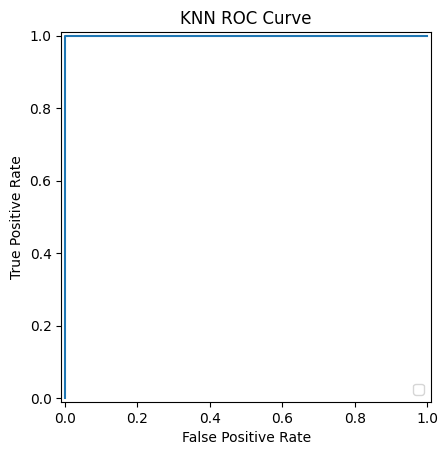

In [42]:
RocCurveDisplay(fpr=fpr, tpr = tpr).plot()
plt.title('KNN ROC Curve')
plt.show()